In [7]:
import pandas as pd ## TO LOAD THE DATA SET 

In [9]:
df=pd.read_csv('blogs.csv')

In [11]:
df

Data              Labels
0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....         alt.atheism
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...         alt.atheism
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...         alt.atheism
...                                                 ...                 ...
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  talk.religion.misc
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...  talk.religion.misc
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...  talk.religion.misc

[2000 rows x 2 columns]

In [14]:
df.head()

Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [19]:

df.dtypes

Data      object
Labels    object
dtype: object

In [21]:
#Preprocess the text data by cleaning it

In [23]:
import nltk

In [25]:
from nltk.corpus import stopwords

In [33]:
from nltk.tokenize import word_tokenize

In [35]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
def preprocess_text(text):  
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords((common words like 'the', 'is' that don’t add much meaning))
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens) ## TO PREPROCESS THE FUNCTION

In [51]:
import string

In [53]:
# Apply preprocessing to the 'Data' column
df['cleaned_data'] = df['Data'].apply(preprocess_text)



In [55]:
df['cleaned_data']

0       path cantaloupesrvcscmuedumagnesiumclubcccmued...
1       newsgroups altatheism path cantaloupesrvcscmue...
2       path cantaloupesrvcscmuedudasnewsharvardedunoc...
3       path cantaloupesrvcscmuedumagnesiumclubcccmued...
4       xref cantaloupesrvcscmuedu altatheism53485 tal...
                              ...                        
1995    xref cantaloupesrvcscmuedu talkabortion120945 ...
1996    xref cantaloupesrvcscmuedu talkreligionmisc837...
1997    xref cantaloupesrvcscmuedu talkorigins41030 ta...
1998    xref cantaloupesrvcscmuedu talkreligionmisc836...
1999    xref cantaloupesrvcscmuedu sciskeptic43561 tal...
Name: cleaned_data, Length: 2000, dtype: object

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer  ## to convert data into numerical format using TF-IDF.

In [60]:
## to initialize

In [64]:
tfidf=TfidfVectorizer(max_features=5000)

In [66]:
tfidf

TfidfVectorizer(max_features=5000)

In [72]:
x=tfidf.fit_transform(df['cleaned_data']).toarray() # Transform the text data

In [74]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [76]:
y=df['Labels']

In [80]:
y # The target labels (categories)

0              alt.atheism
1              alt.atheism
2              alt.atheism
3              alt.atheism
4              alt.atheism
               ...        
1995    talk.religion.misc
1996    talk.religion.misc
1997    talk.religion.misc
1998    talk.religion.misc
1999    talk.religion.misc
Name: Labels, Length: 2000, dtype: object

In [82]:
## Naive Bayes Model for Text Classification

In [84]:
from sklearn.model_selection import train_test_split

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2) ## splitting the data set

In [90]:
x_train

array([[0.        , 0.        , 0.        , ..., 0.33774788, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [92]:

x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [94]:
y_train

968          rec.sport.baseball
240     comp.os.ms-windows.misc
819             rec.motorcycles
692                misc.forsale
420       comp.sys.mac.hardware
                 ...           
1130                  sci.crypt
1294            sci.electronics
860             rec.motorcycles
1459                  sci.space
1126                  sci.crypt
Name: Labels, Length: 1600, dtype: object

In [96]:

y_test

1860          talk.politics.misc
353     comp.sys.ibm.pc.hardware
1333                     sci.med
905           rec.sport.baseball
1289             sci.electronics
                  ...           
965           rec.sport.baseball
1284             sci.electronics
1739       talk.politics.mideast
261      comp.os.ms-windows.misc
535               comp.windows.x
Name: Labels, Length: 400, dtype: object

In [98]:
#Train a Naive Bayes classifier and make predictions

In [108]:
from sklearn.naive_bayes import MultinomialNB

In [110]:
from sklearn.metrics import classification_report, accuracy_score

In [126]:
## INITIALIZING, TRAING AND PREICTING THE MODEL

In [114]:
nb=MultinomialNB()

In [116]:
nb

MultinomialNB()

In [120]:
nb.fit(x_train,y_train)

MultinomialNB()

In [122]:
y_pred=nb.predict(x_test)

In [124]:
y_pred

array(['talk.politics.misc', 'comp.sys.ibm.pc.hardware', 'sci.med',
       'rec.sport.baseball', 'sci.electronics', 'sci.electronics',
       'rec.sport.baseball', 'talk.politics.mideast', 'alt.atheism',
       'sci.med', 'alt.atheism', 'sci.med', 'sci.crypt', 'comp.windows.x',
       'comp.sys.ibm.pc.hardware', 'comp.os.ms-windows.misc', 'rec.autos',
       'comp.graphics', 'talk.politics.guns', 'talk.politics.misc',
       'comp.sys.mac.hardware', 'alt.atheism', 'alt.atheism',
       'rec.sport.hockey', 'alt.atheism', 'sci.crypt',
       'talk.politics.misc', 'rec.sport.baseball', 'rec.autos',
       'alt.atheism', 'rec.sport.baseball', 'rec.sport.hockey',
       'comp.windows.x', 'rec.sport.baseball', 'rec.sport.hockey',
       'comp.sys.mac.hardware', 'sci.med', 'sci.electronics',
       'rec.sport.hockey', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'soc.religion.christian',
       'comp.os.ms-windows.misc', 'rec.sport.baseball',
       'soc.religion.christian', 

In [128]:
##Sentiment Analysis

In [134]:
!pip install -U textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   -- ------------------------------------ 41.0/626.3 kB 393.8 kB/s eta 0:00:02
   ---- ---------------------------------- 71.7/626.3 kB 491.5 kB/s eta 0:00:02
   ------- ------------------------------ 122.9/626.3 kB 654.9 kB/s eta 0:00:01
   --------- ---------------------------- 163.8/626.3 kB 701.4 kB/s eta 0:00:01
   ------------- ------------------------ 215.0/626.3 kB 769.9 kB/s eta 0:00:01
   -------------- ----------------------- 245.8/626.3 kB 752.5 kB/s eta 0:00:01
   ------------------- ------------------ 317.4/626.3 kB 819.2 kB/s eta 0:00:01
   --------------------- ---------------- 348.2/626.3 kB 832.3 kB/s eta 0:00:01
   ------------------------ ------------- 409.6/626.3 kB 851.5 kB/s eta 0:00:01
   --------------------------- ---------- 450.6/626.3 kB 853.3 kB/

In [136]:
from textblob import TextBlob

In [138]:
# Function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [140]:
# Apply sentiment analysis on the 'Data' column
df['Sentiment'] = df['Data'].apply(get_sentiment)

In [142]:
df['Sentiment']

0       Positive
1       Negative
2       Positive
3       Positive
4       Positive
          ...   
1995    Positive
1996    Positive
1997    Positive
1998    Positive
1999    Positive
Name: Sentiment, Length: 2000, dtype: object

In [144]:
df['Sentiment'].value_counts()

Sentiment
Positive    1543
Negative     457
Name: count, dtype: int64

In [146]:
## Sentiment Distribution

In [148]:
import matplotlib.pyplot as plt

In [150]:
import seaborn as sns

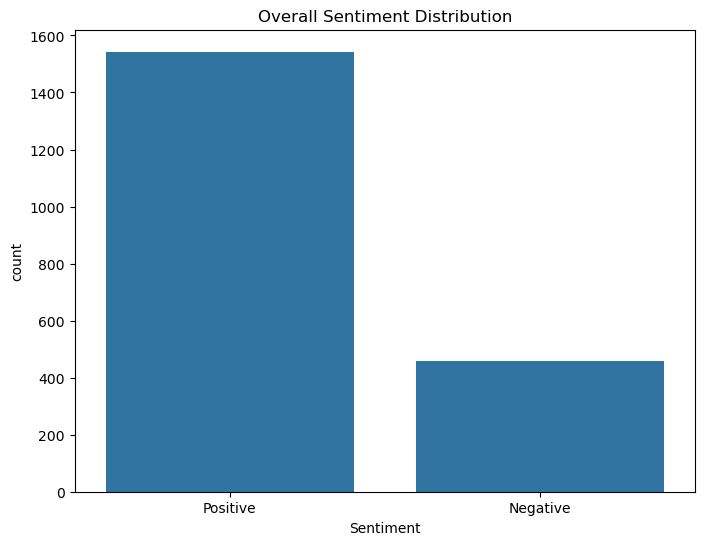

In [162]:
plt.figure(figsize=(8,6))
sns.countplot(x='Sentiment',data=df)
plt.title('Overall Sentiment Distribution')
plt.show() ## across all category

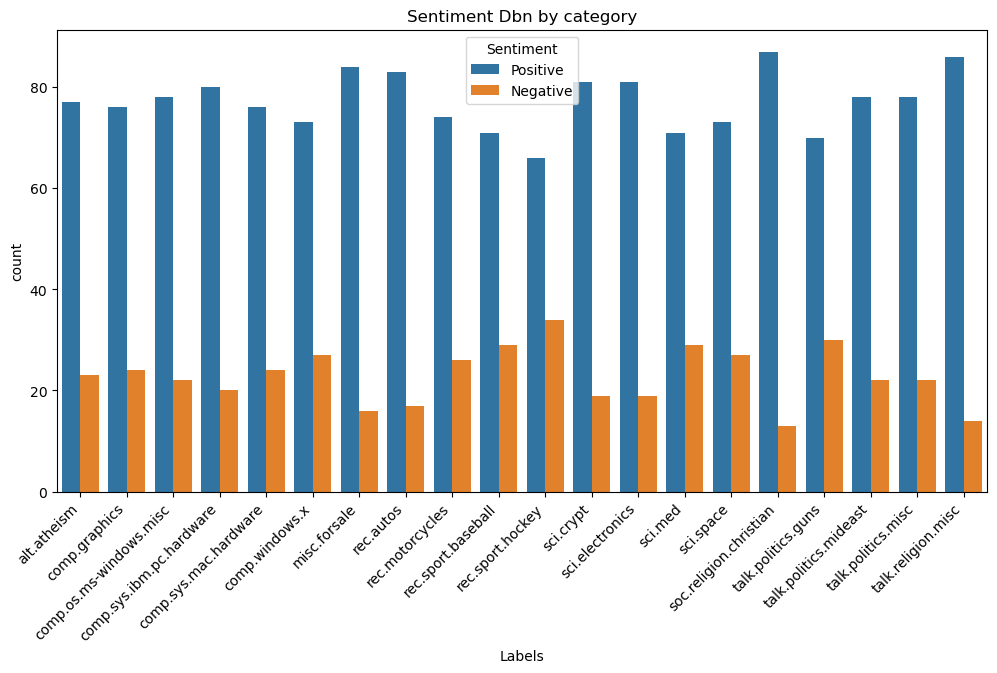

In [170]:
plt.figure(figsize=(12, 6))# Sentiment distribution within each category
sns.countplot(x='Labels', hue='Sentiment', data=df)
plt.xticks(rotation=45,ha='right') # Rotate x-axis labels for better readability
plt.title('Sentiment Dbn by category')
plt.show()

In [172]:
# Group by categories and sentiment
sentiment_distribution = df.groupby(['Labels', 'Sentiment']).size().unstack()
print(sentiment_distribution)

Sentiment                 Negative  Positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc              22        78
talk.religion.misc              14        86


In [174]:
!pip install seaborn wordcloud

In [176]:
from wordcloud import WordCloud

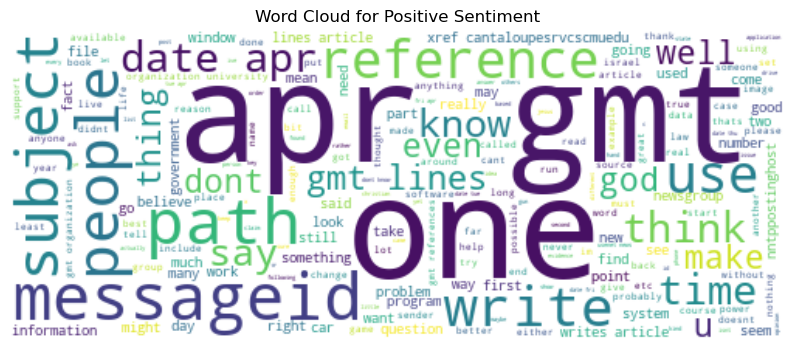

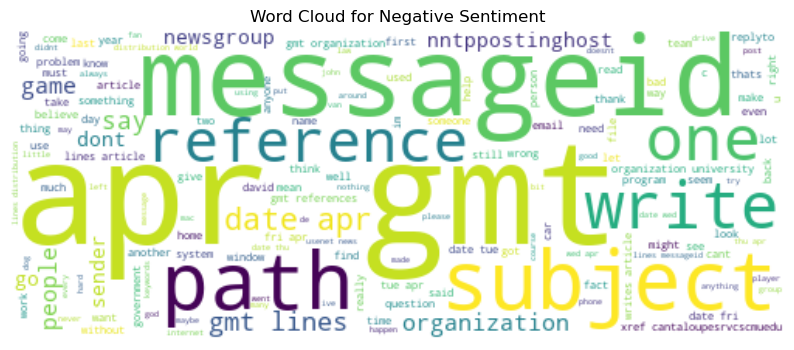

In [180]:
for sentiment in df['Sentiment'].unique():
    text = ' '.join(df[df['Sentiment'] == sentiment]['cleaned_data'])
    wordcloud = WordCloud(width=500, height=200, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show() # Generate word cloud for each sentiment

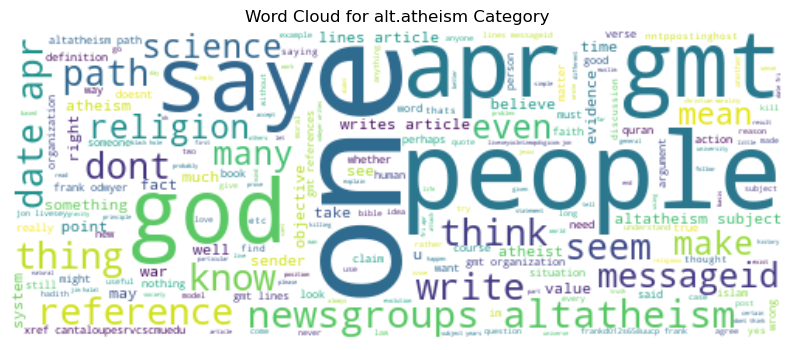

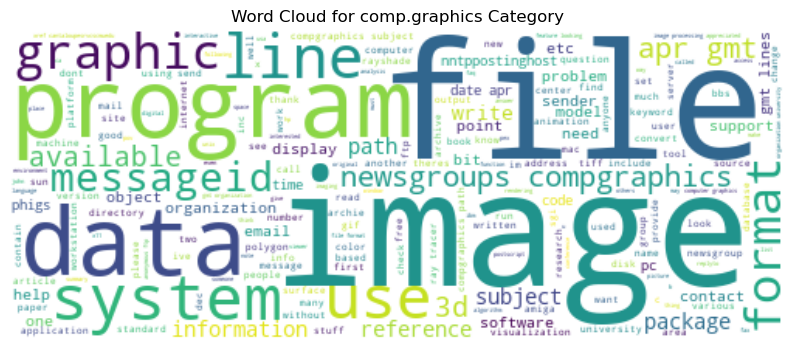

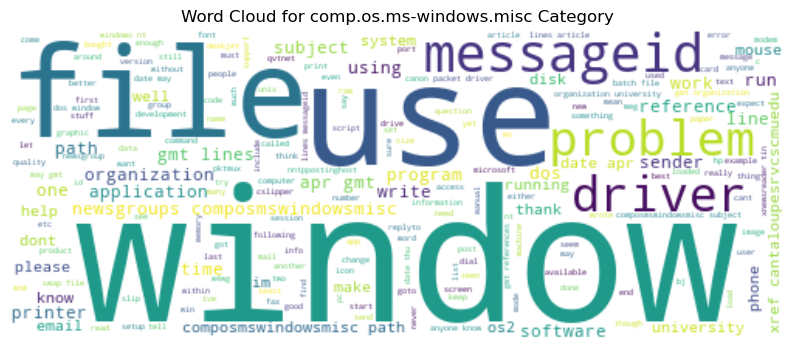

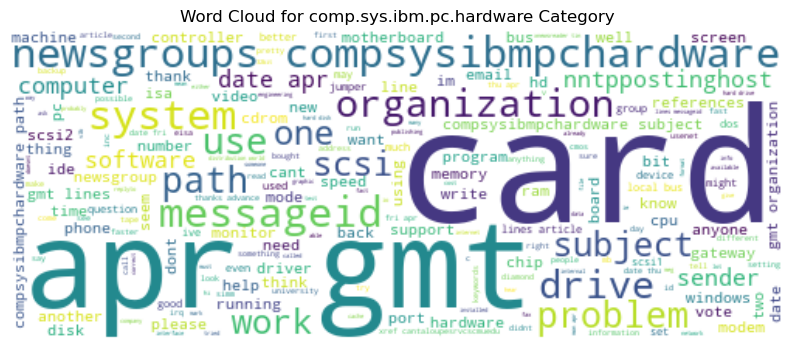

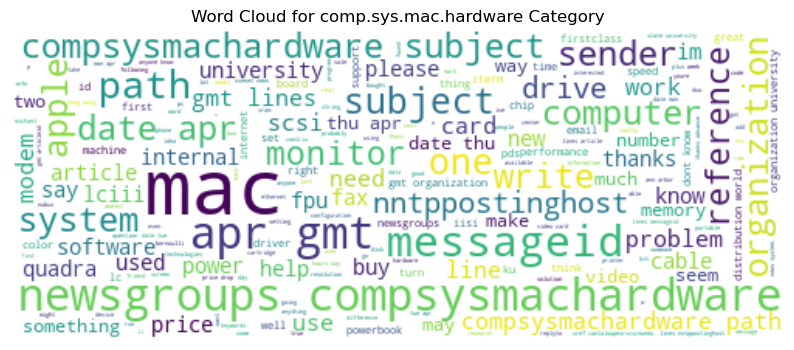

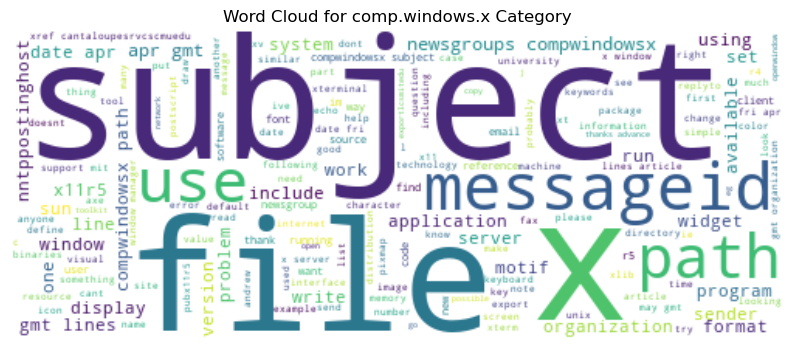

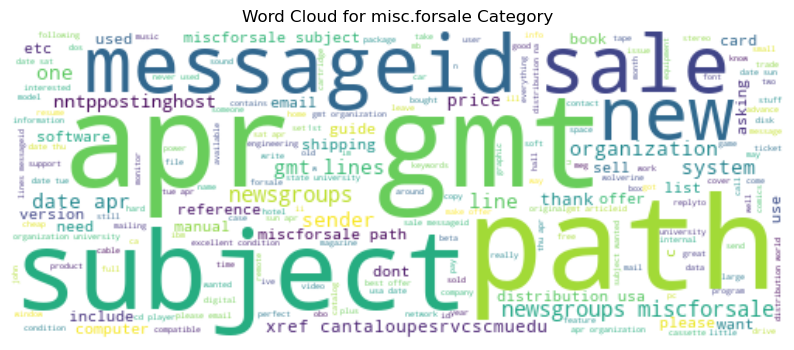

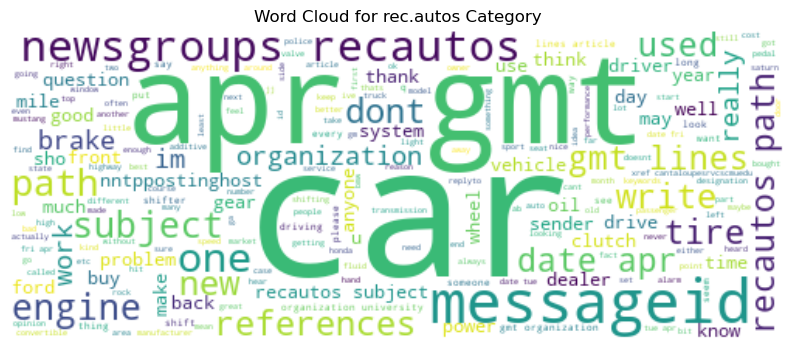

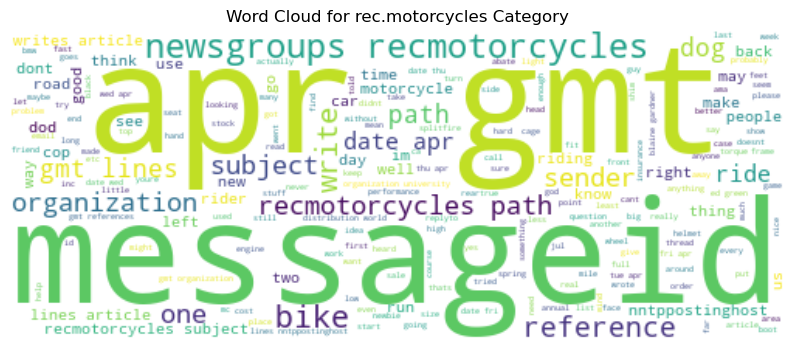

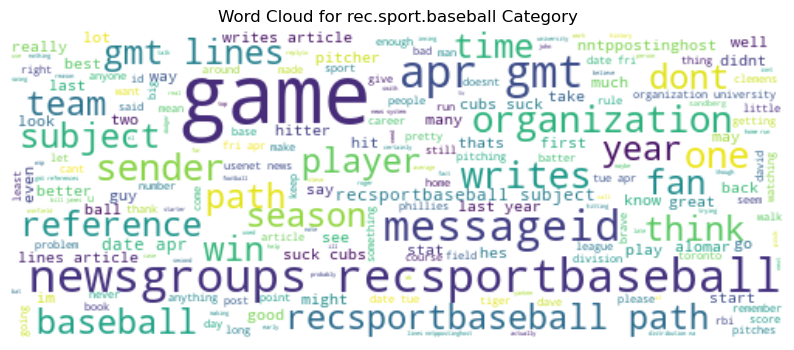

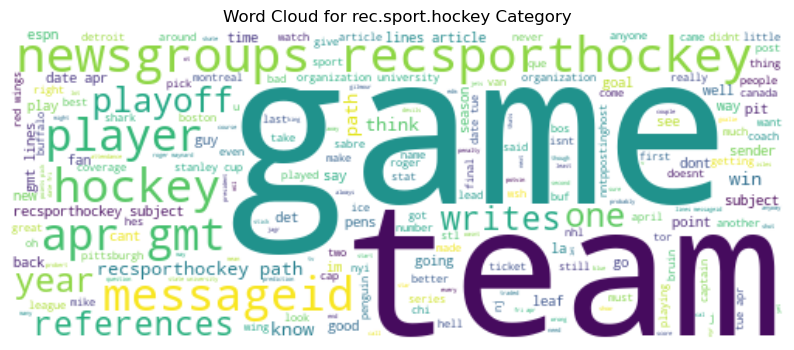

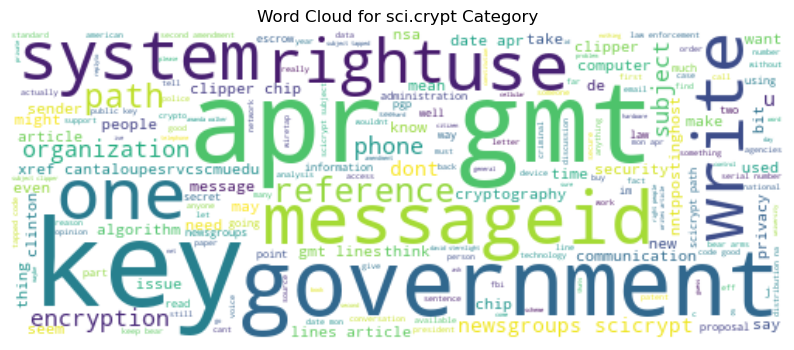

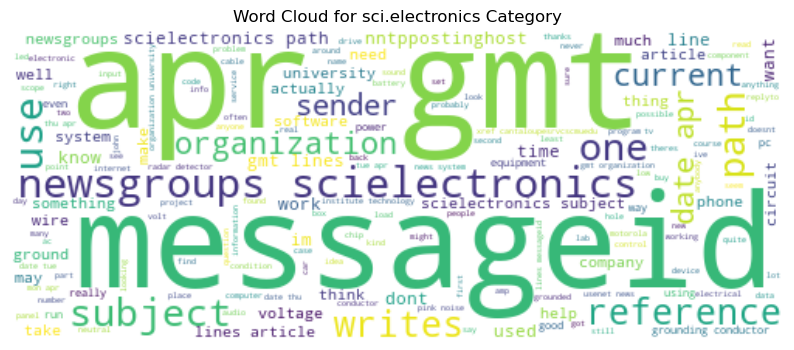

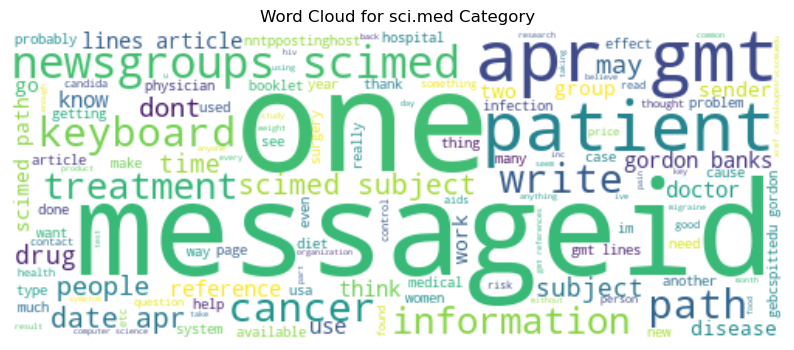

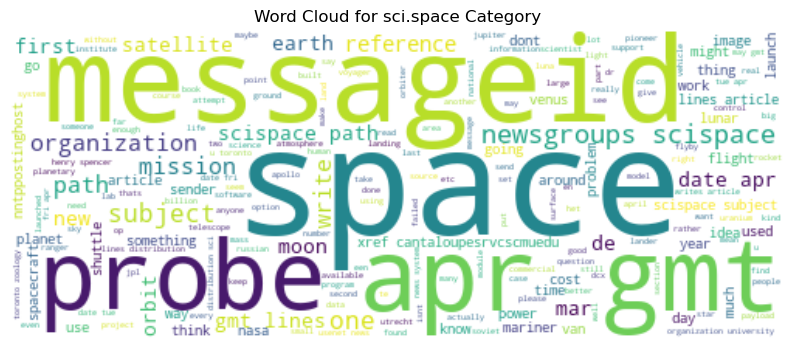

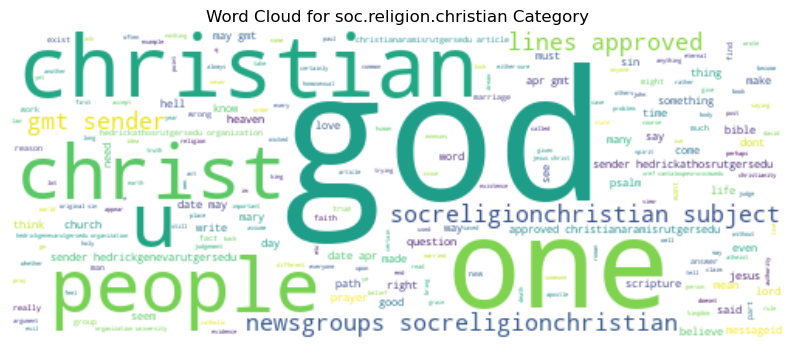

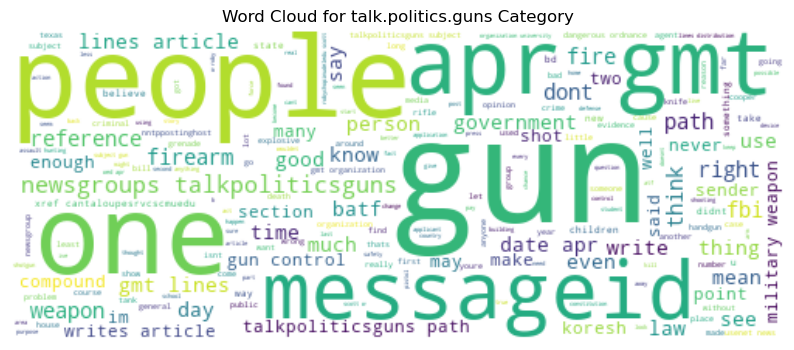

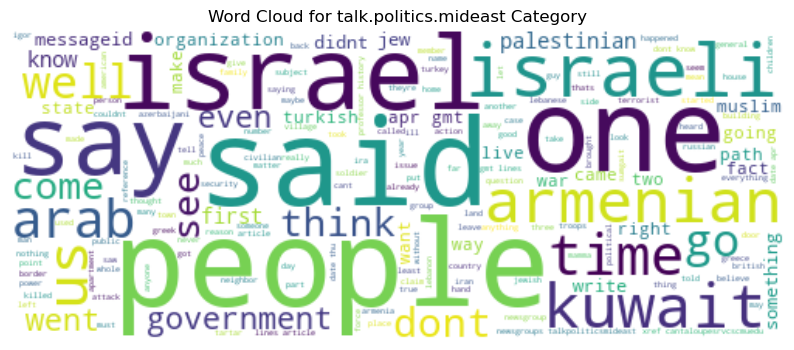

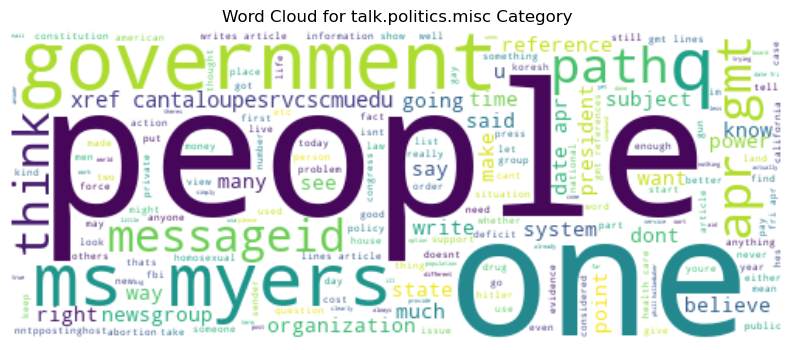

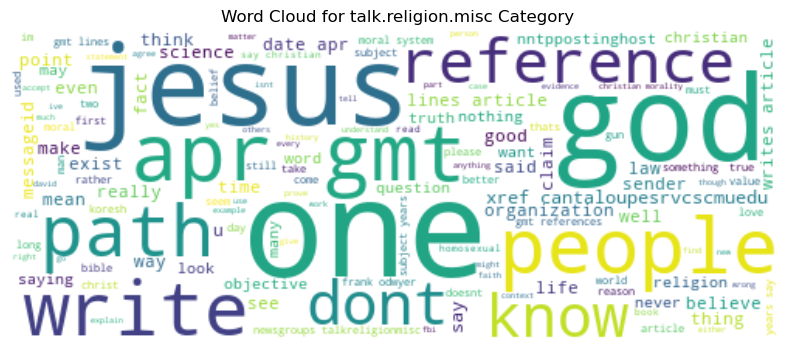

In [182]:
for category in df['Labels'].unique():
    text = ' '.join(df[df['Labels'] == category]['cleaned_data'])
    wordcloud = WordCloud(width=500, height=200, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {category} Category')
    plt.show() # Generate word cloud for each category

In [186]:
# Evaluate the model
acc_score=accuracy_score(y_test, y_pred)

In [188]:
acc_score


0.8225

In [192]:
class_report=classification_report(y_test, y_pred)

In [194]:
class_report

'                          precision    recall  f1-score   support\n\n             alt.atheism       0.50      0.83      0.62        18\n           comp.graphics       0.79      0.83      0.81        18\n comp.os.ms-windows.misc       0.86      0.82      0.84        22\ncomp.sys.ibm.pc.hardware       0.76      0.76      0.76        25\n   comp.sys.mac.hardware       0.83      0.90      0.86        21\n          comp.windows.x       0.91      0.84      0.88        25\n            misc.forsale       0.82      0.78      0.80        18\n               rec.autos       0.89      0.94      0.92        18\n         rec.motorcycles       0.94      0.94      0.94        16\n      rec.sport.baseball       0.77      0.94      0.85        18\n        rec.sport.hockey       0.88      1.00      0.94        15\n               sci.crypt       0.95      0.95      0.95        19\n         sci.electronics       0.62      0.62      0.62        16\n                 sci.med       0.88      0.88      0.88    